In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px


In [14]:
data_ = pd.read_csv('resampled_data_.csv')
data_.head()

,DATE,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,...,Core_CPI_MoM,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM
0,1988-01-31,0.00,0.00,2.44,1.04,116.00,120.90,104.60,3213.70,2689.80,...,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,-0.09,0.00,0.05
1,1988-02-29,0.00,0.00,2.36,1.03,116.20,121.20,104.80,3221.40,2701.50,...,0.00,0.00,0.00,0.00,-0.06,0.00,0.00,0.16,0.00,0.01
2,1988-03-31,0.00,0.00,2.70,1.16,116.50,121.70,104.90,3260.50,2731.50,...,0.00,0.00,0.01,0.01,0.07,0.00,0.00,0.04,0.01,0.03
3,1988-04-30,0.00,0.00,2.71,1.14,117.20,122.30,105.80,3263.00,2735.40,...,0.00,0.01,0.00,0.00,0.06,-0.05,-0.00,0.03,0.01,-0.04
4,1988-05-31,0.00,0.00,2.53,0.99,117.50,122.70,106.50,3293.60,2762.20,...,0.00,0.01,0.01,0.01,-0.03,0.04,0.00,-0.10,0.01,0.04


In [15]:
data_.shape

(433, 62)

In [16]:
data_.columns

Index(['DATE', 'Recession_GDP', 'Recession_NBER', 'Yield_Spread_10Y3M',
       'Yield_Spread_10Y2Y', 'CPI', 'Core_CPI', 'PPI', 'PCE', 'Core_PCE',
       'WTI', 'Unemployment_Rate', 'Natural_Unemployment_Rate',
       'New_Housing_Units', 'Case_Shiller', 'NFCI', 'NFCI_Leverage',
       'UMC_Sentiment', 'CPI_YoY', 'Core_CPI_YoY', 'PPI_YoY', 'PCE_YoY',
       'Core_PCE_YoY', 'WTI_YoY', 'Unemployment_Rate_YoY',
       'Natural_Unemployment_Rate_YoY', 'New_Housing_Units_YoY',
       'Case_Shiller_YoY', 'UMC_Sentiment_YoY', 'CPI_HoH', 'Core_CPI_HoH',
       'PPI_HoH', 'PCE_HoH', 'Core_PCE_HoH', 'WTI_HoH',
       'Unemployment_Rate_HoH', 'Natural_Unemployment_Rate_HoH',
       'New_Housing_Units_HoH', 'Case_Shiller_HoH', 'UMC_Sentiment_HoH',
       'CPI_QoQ', 'Core_CPI_QoQ', 'PPI_QoQ', 'PCE_QoQ', 'Core_PCE_QoQ',
       'WTI_QoQ', 'Unemployment_Rate_QoQ', 'Natural_Unemployment_Rate_QoQ',
       'New_Housing_Units_QoQ', 'Case_Shiller_QoQ', 'UMC_Sentiment_QoQ',
       'CPI_MoM', 'Core_CPI_MoM', 

In [17]:
data_.set_index('DATE', inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
scaler = MinMaxScaler()
data_[['Recession_NBER','Yield_Spread_10Y3M','Yield_Spread_10Y2Y','CPI', 'Core_CPI', 'PPI', 'PCE', 'Core_PCE',
       'WTI', 'Unemployment_Rate', 'Natural_Unemployment_Rate',
       'New_Housing_Units', 'Case_Shiller', 'NFCI', 'NFCI_Leverage',
       'UMC_Sentiment','CPI_MoM', 'Core_CPI_MoM', 'PPI_MoM', 'PCE_MoM', 'Core_PCE_MoM',
       'WTI_MoM', 'Unemployment_Rate_MoM', 'Natural_Unemployment_Rate_MoM',
       'New_Housing_Units_MoM', 'Case_Shiller_MoM', 'UMC_Sentiment_MoM']]
data_

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,Core_CPI_MoM,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM
DATE,,,,,,,,,,,,,,,,,,,,,
1988-01-31,0.00,0.00,2.44,1.04,116.00,120.90,104.60,3213.70,2689.80,16.97,...,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,-0.09,0.00,0.05
1988-02-29,0.00,0.00,2.36,1.03,116.20,121.20,104.80,3221.40,2701.50,15.98,...,0.00,0.00,0.00,0.00,-0.06,0.00,0.00,0.16,0.00,0.01
1988-03-31,0.00,0.00,2.70,1.16,116.50,121.70,104.90,3260.50,2731.50,17.09,...,0.00,0.00,0.01,0.01,0.07,0.00,0.00,0.04,0.01,0.03
1988-04-30,0.00,0.00,2.71,1.14,117.20,122.30,105.80,3263.00,2735.40,18.10,...,0.00,0.01,0.00,0.00,0.06,-0.05,-0.00,0.03,0.01,-0.04
1988-05-31,0.00,0.00,2.53,0.99,117.50,122.70,106.50,3293.60,2762.20,17.54,...,0.00,0.01,0.01,0.01,-0.03,0.04,0.00,-0.10,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.00,0.00,-0.96,-0.44,307.48,310.66,258.86,18791.50,16522.50,90.77,...,0.00,0.00,0.01,0.01,0.09,0.00,0.00,0.04,0.00,-0.02
2023-10-31,0.00,0.00,-0.71,-0.19,307.62,311.37,255.04,18812.20,16560.60,81.64,...,0.00,-0.01,0.00,0.00,-0.10,0.00,-0.00,0.01,0.00,-0.06
2023-11-30,0.00,0.00,-1.08,-0.36,307.92,312.25,252.84,18858.90,16629.20,75.66,...,0.00,-0.01,0.00,0.00,-0.07,-0.03,0.00,0.11,0.00,-0.04


<Axes: xlabel='DATE', ylabel='Recession_GDP'>

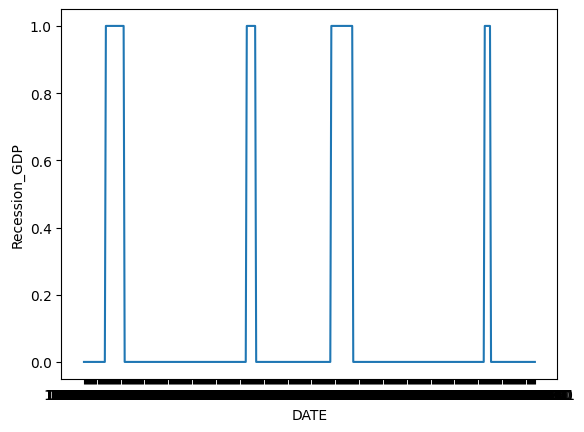

In [7]:
sns.lineplot(data_["Recession_GDP"])

Recession_GDP
Recession_NBER
Yield_Spread_10Y3M
Yield_Spread_10Y2Y
CPI
Core_CPI
PPI
PCE
Core_PCE
WTI
Unemployment_Rate
Natural_Unemployment_Rate
New_Housing_Units
Case_Shiller
NFCI
NFCI_Leverage
UMC_Sentiment
CPI_YoY
Core_CPI_YoY
PPI_YoY


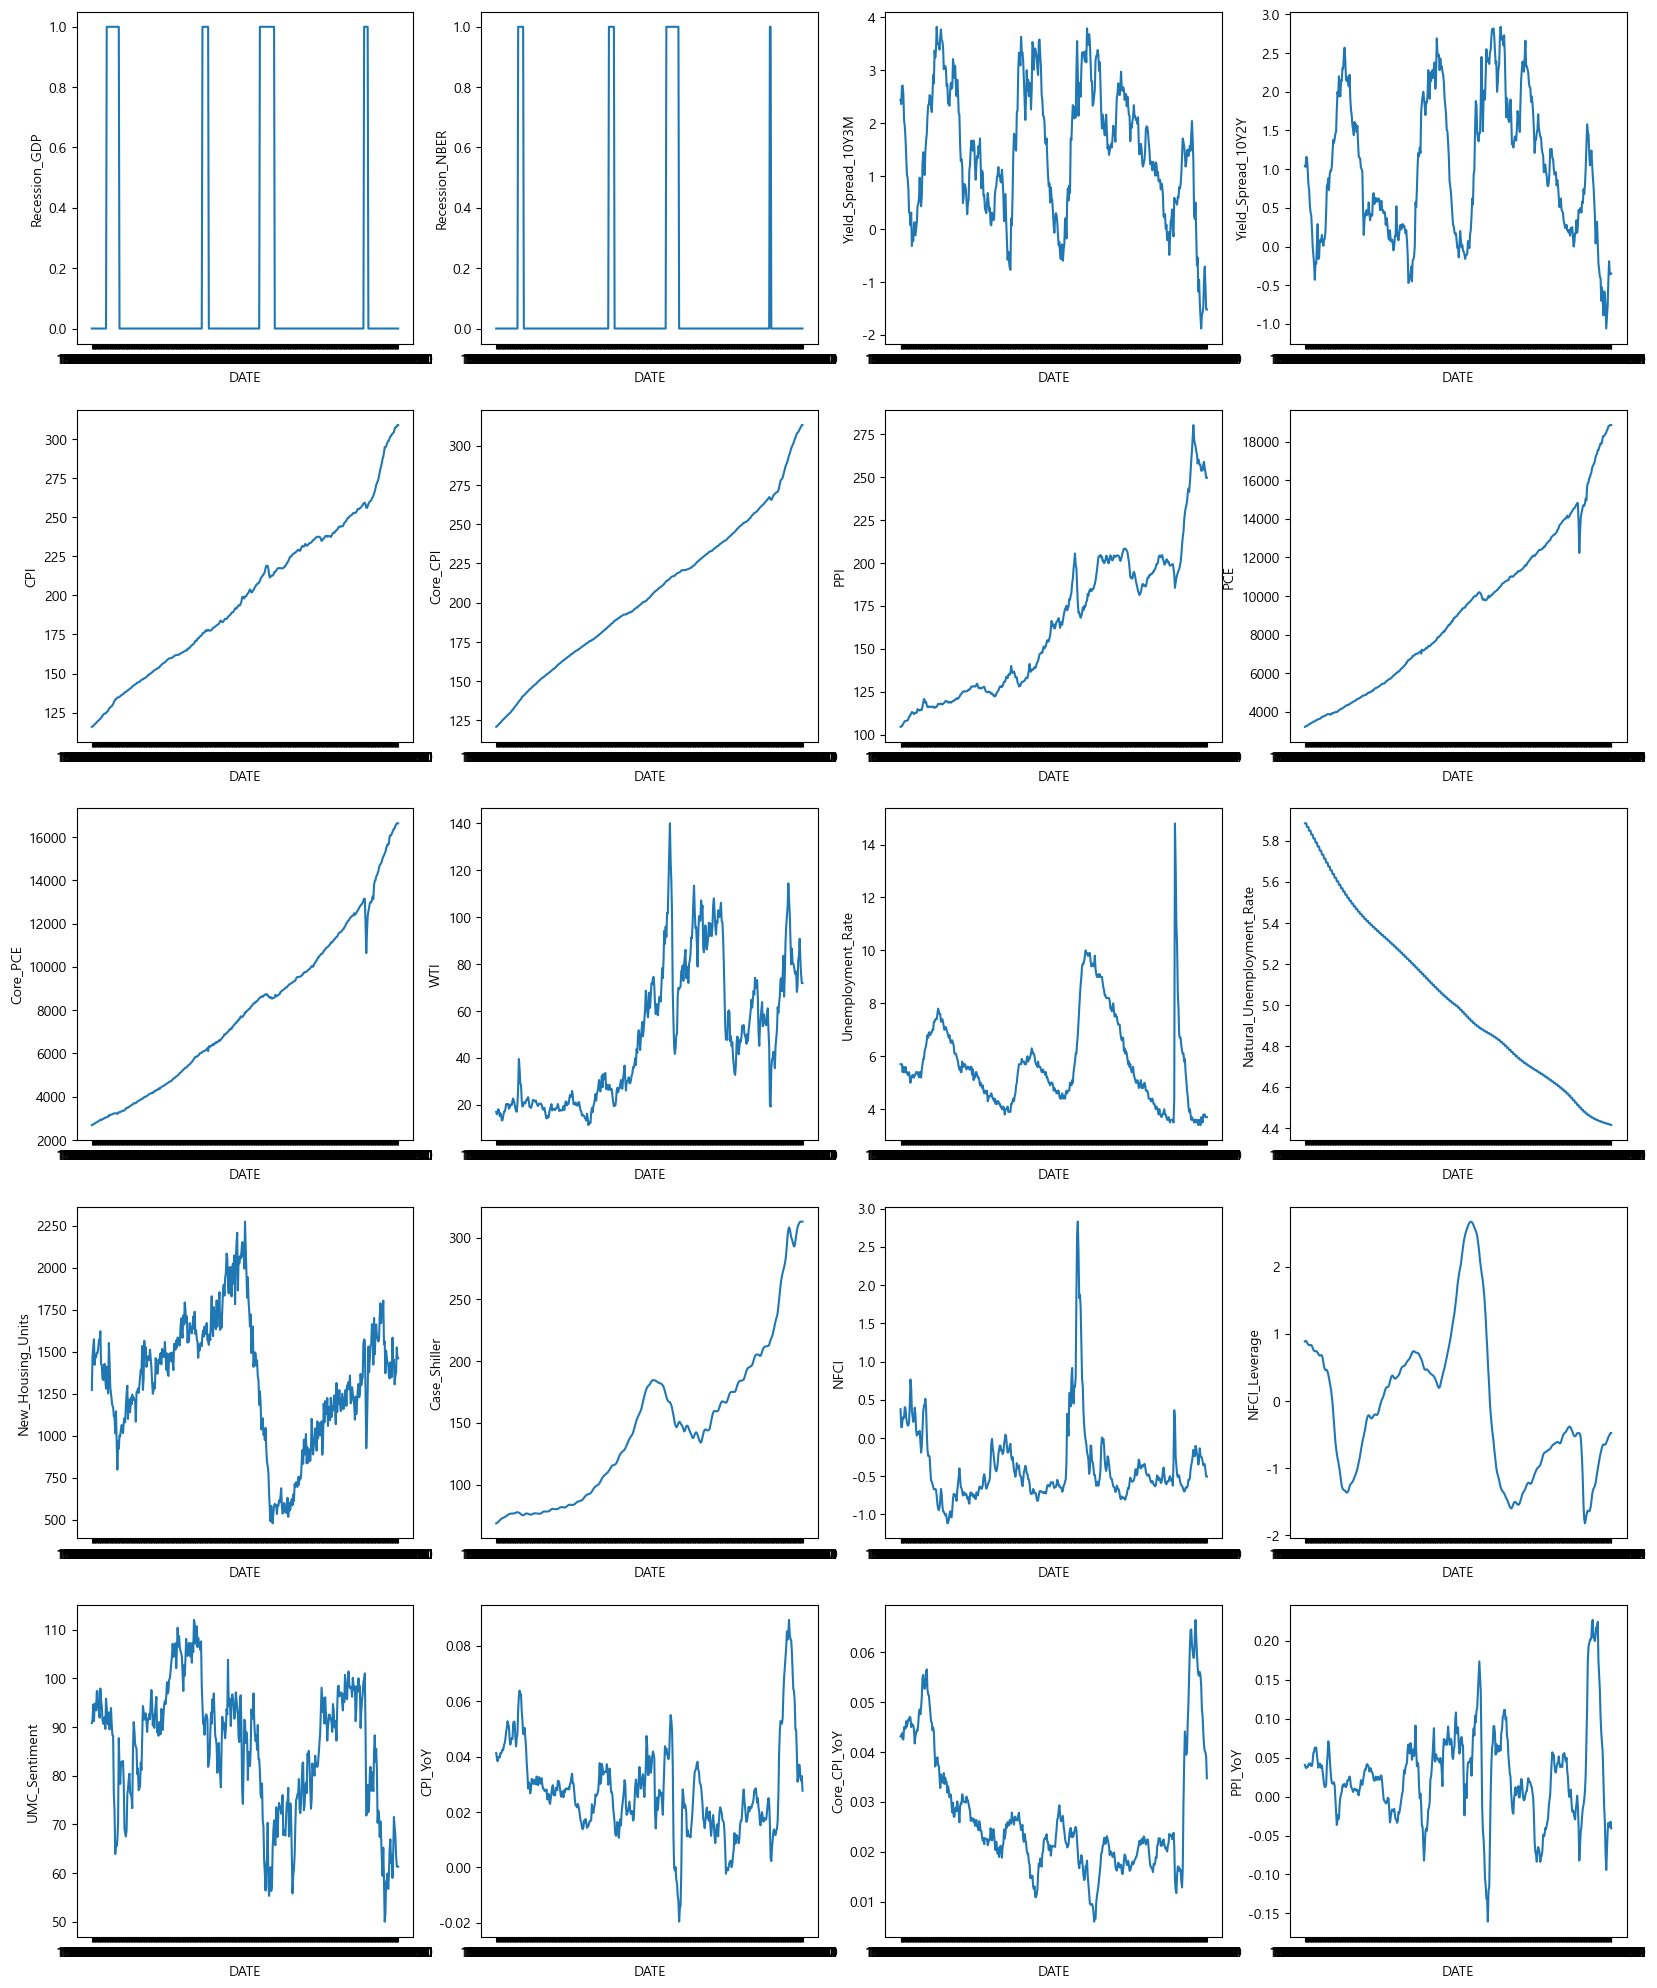

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 4
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))



for i,col in enumerate(data_[data_.columns[:20]]):
    print(col)
    sns.lineplot(data_[col], ax=ax[int(i/col_n),int(i%col_n)])

PCE_YoY
Core_PCE_YoY
WTI_YoY
Unemployment_Rate_YoY
Natural_Unemployment_Rate_YoY
New_Housing_Units_YoY
Case_Shiller_YoY
UMC_Sentiment_YoY
CPI_HoH
Core_CPI_HoH
PPI_HoH
PCE_HoH
Core_PCE_HoH
WTI_HoH
Unemployment_Rate_HoH
Natural_Unemployment_Rate_HoH
New_Housing_Units_HoH
Case_Shiller_HoH
UMC_Sentiment_HoH
CPI_QoQ


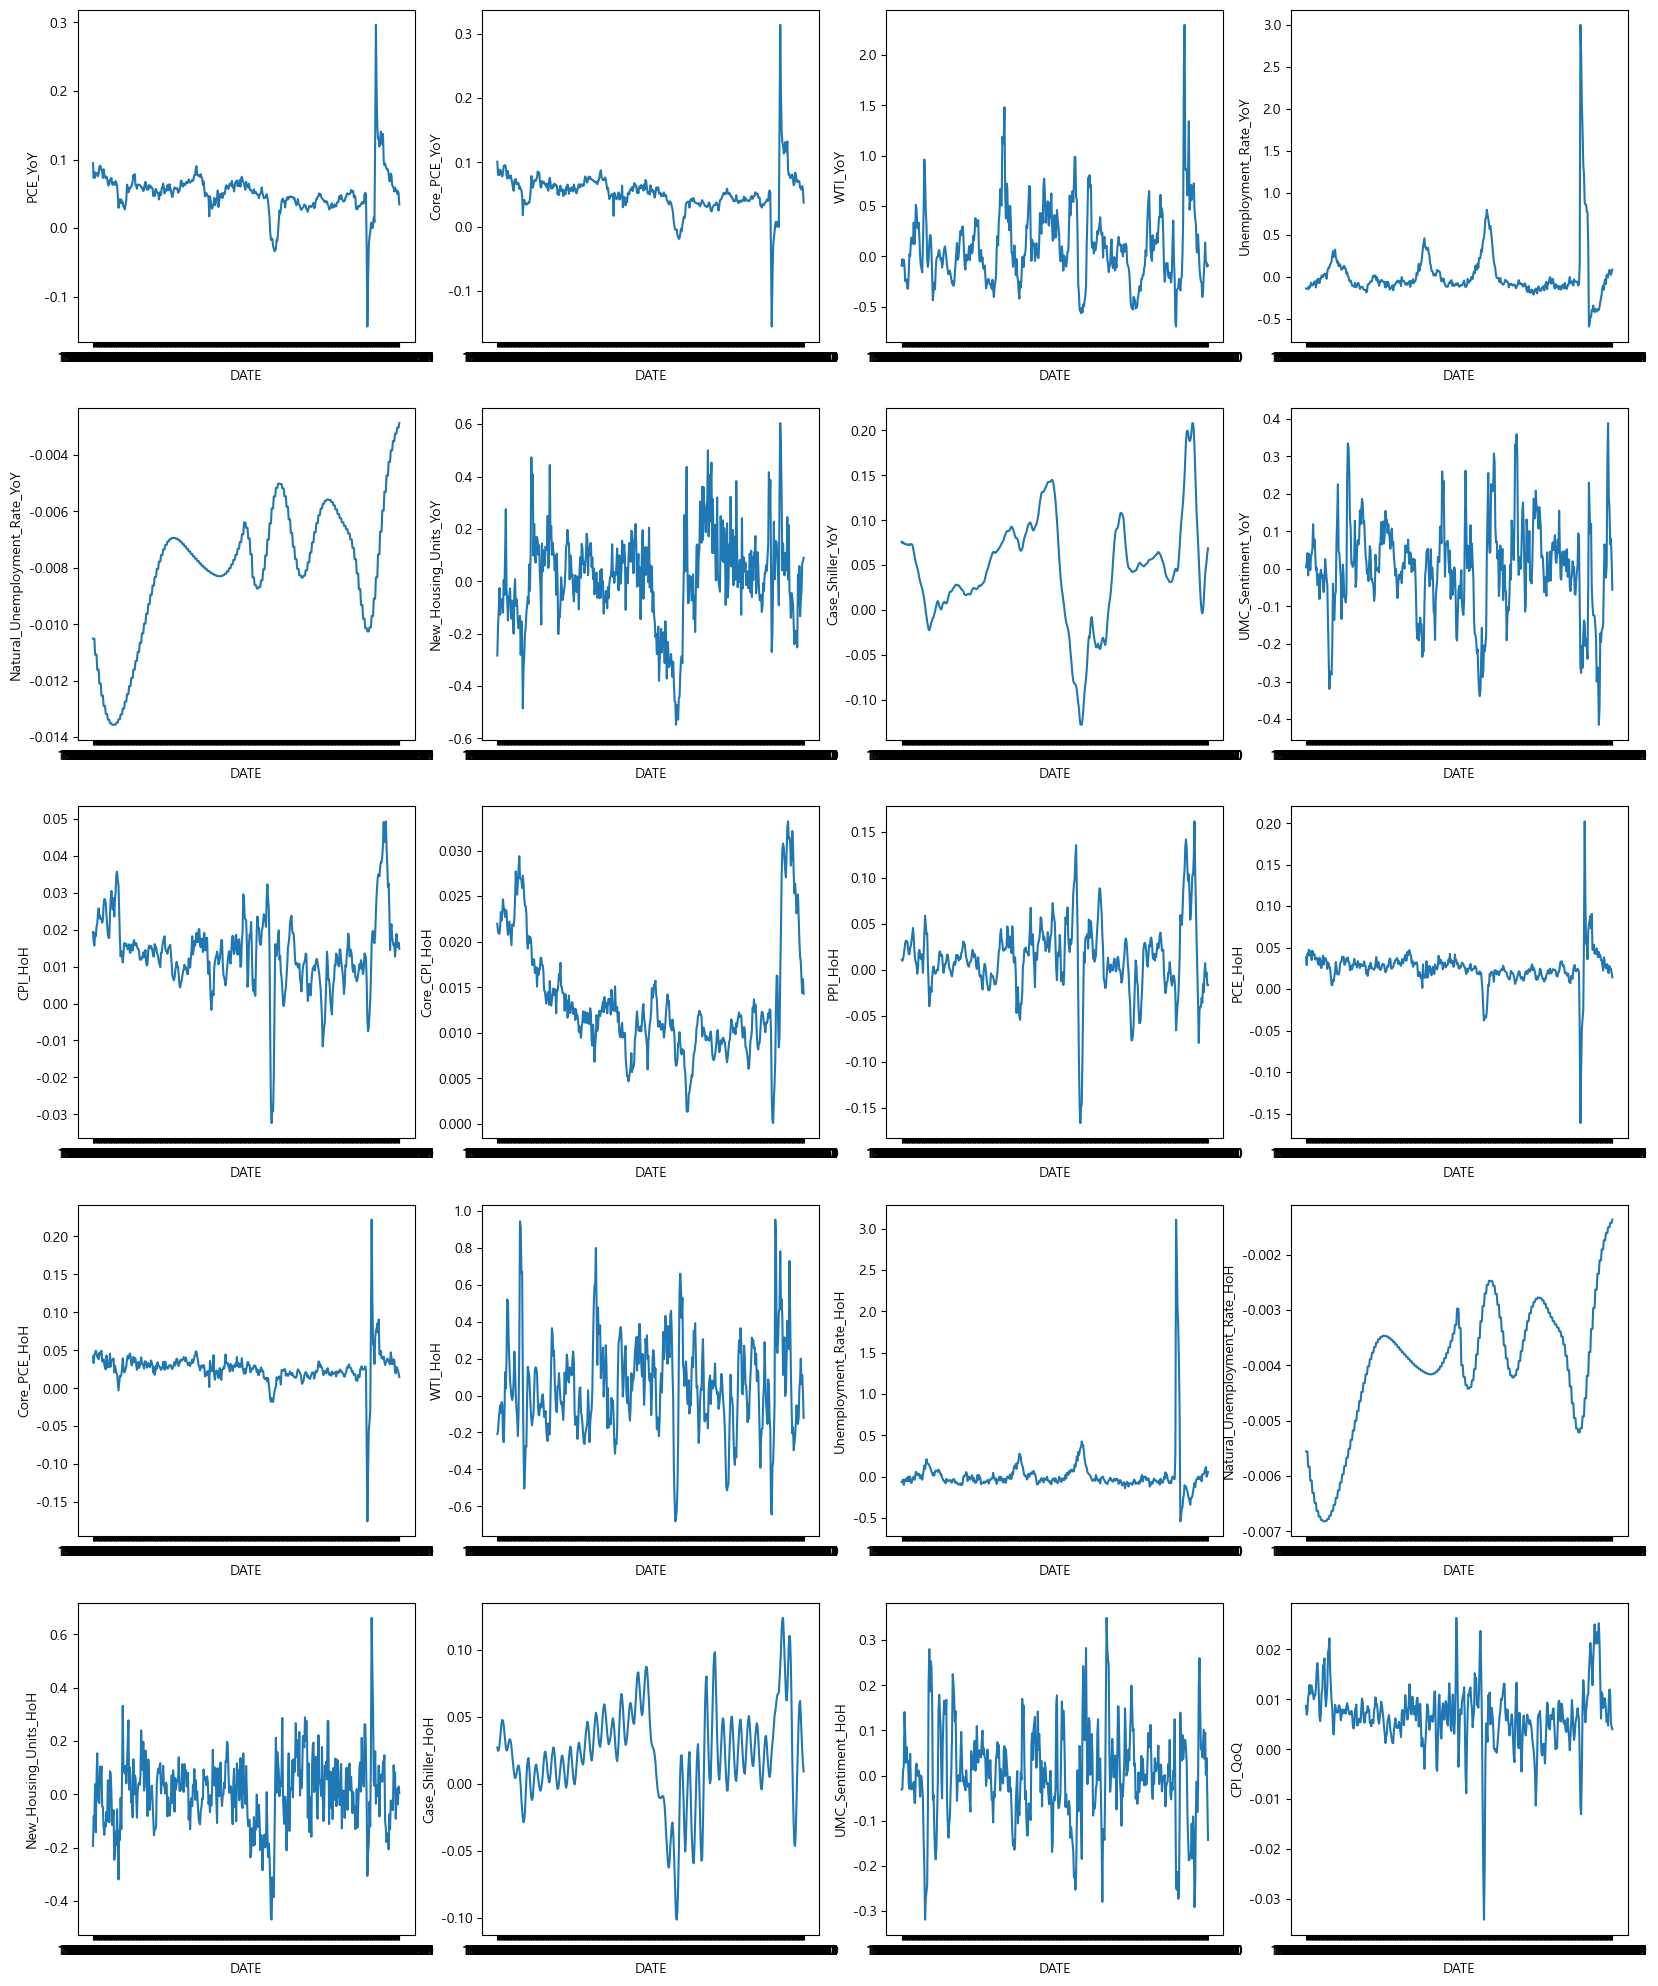

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 4
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))



for i,col in enumerate(data_[data_.columns[20:40]]):
    print(col)
    sns.lineplot(data_[col], ax=ax[int(i/col_n),int(i%col_n)])

Core_CPI_QoQ
PPI_QoQ
PCE_QoQ
Core_PCE_QoQ
WTI_QoQ
Unemployment_Rate_QoQ
Natural_Unemployment_Rate_QoQ
New_Housing_Units_QoQ
Case_Shiller_QoQ
UMC_Sentiment_QoQ
CPI_MoM
Core_CPI_MoM
PPI_MoM
PCE_MoM
Core_PCE_MoM
WTI_MoM
Unemployment_Rate_MoM
Natural_Unemployment_Rate_MoM
New_Housing_Units_MoM
Case_Shiller_MoM
UMC_Sentiment_MoM


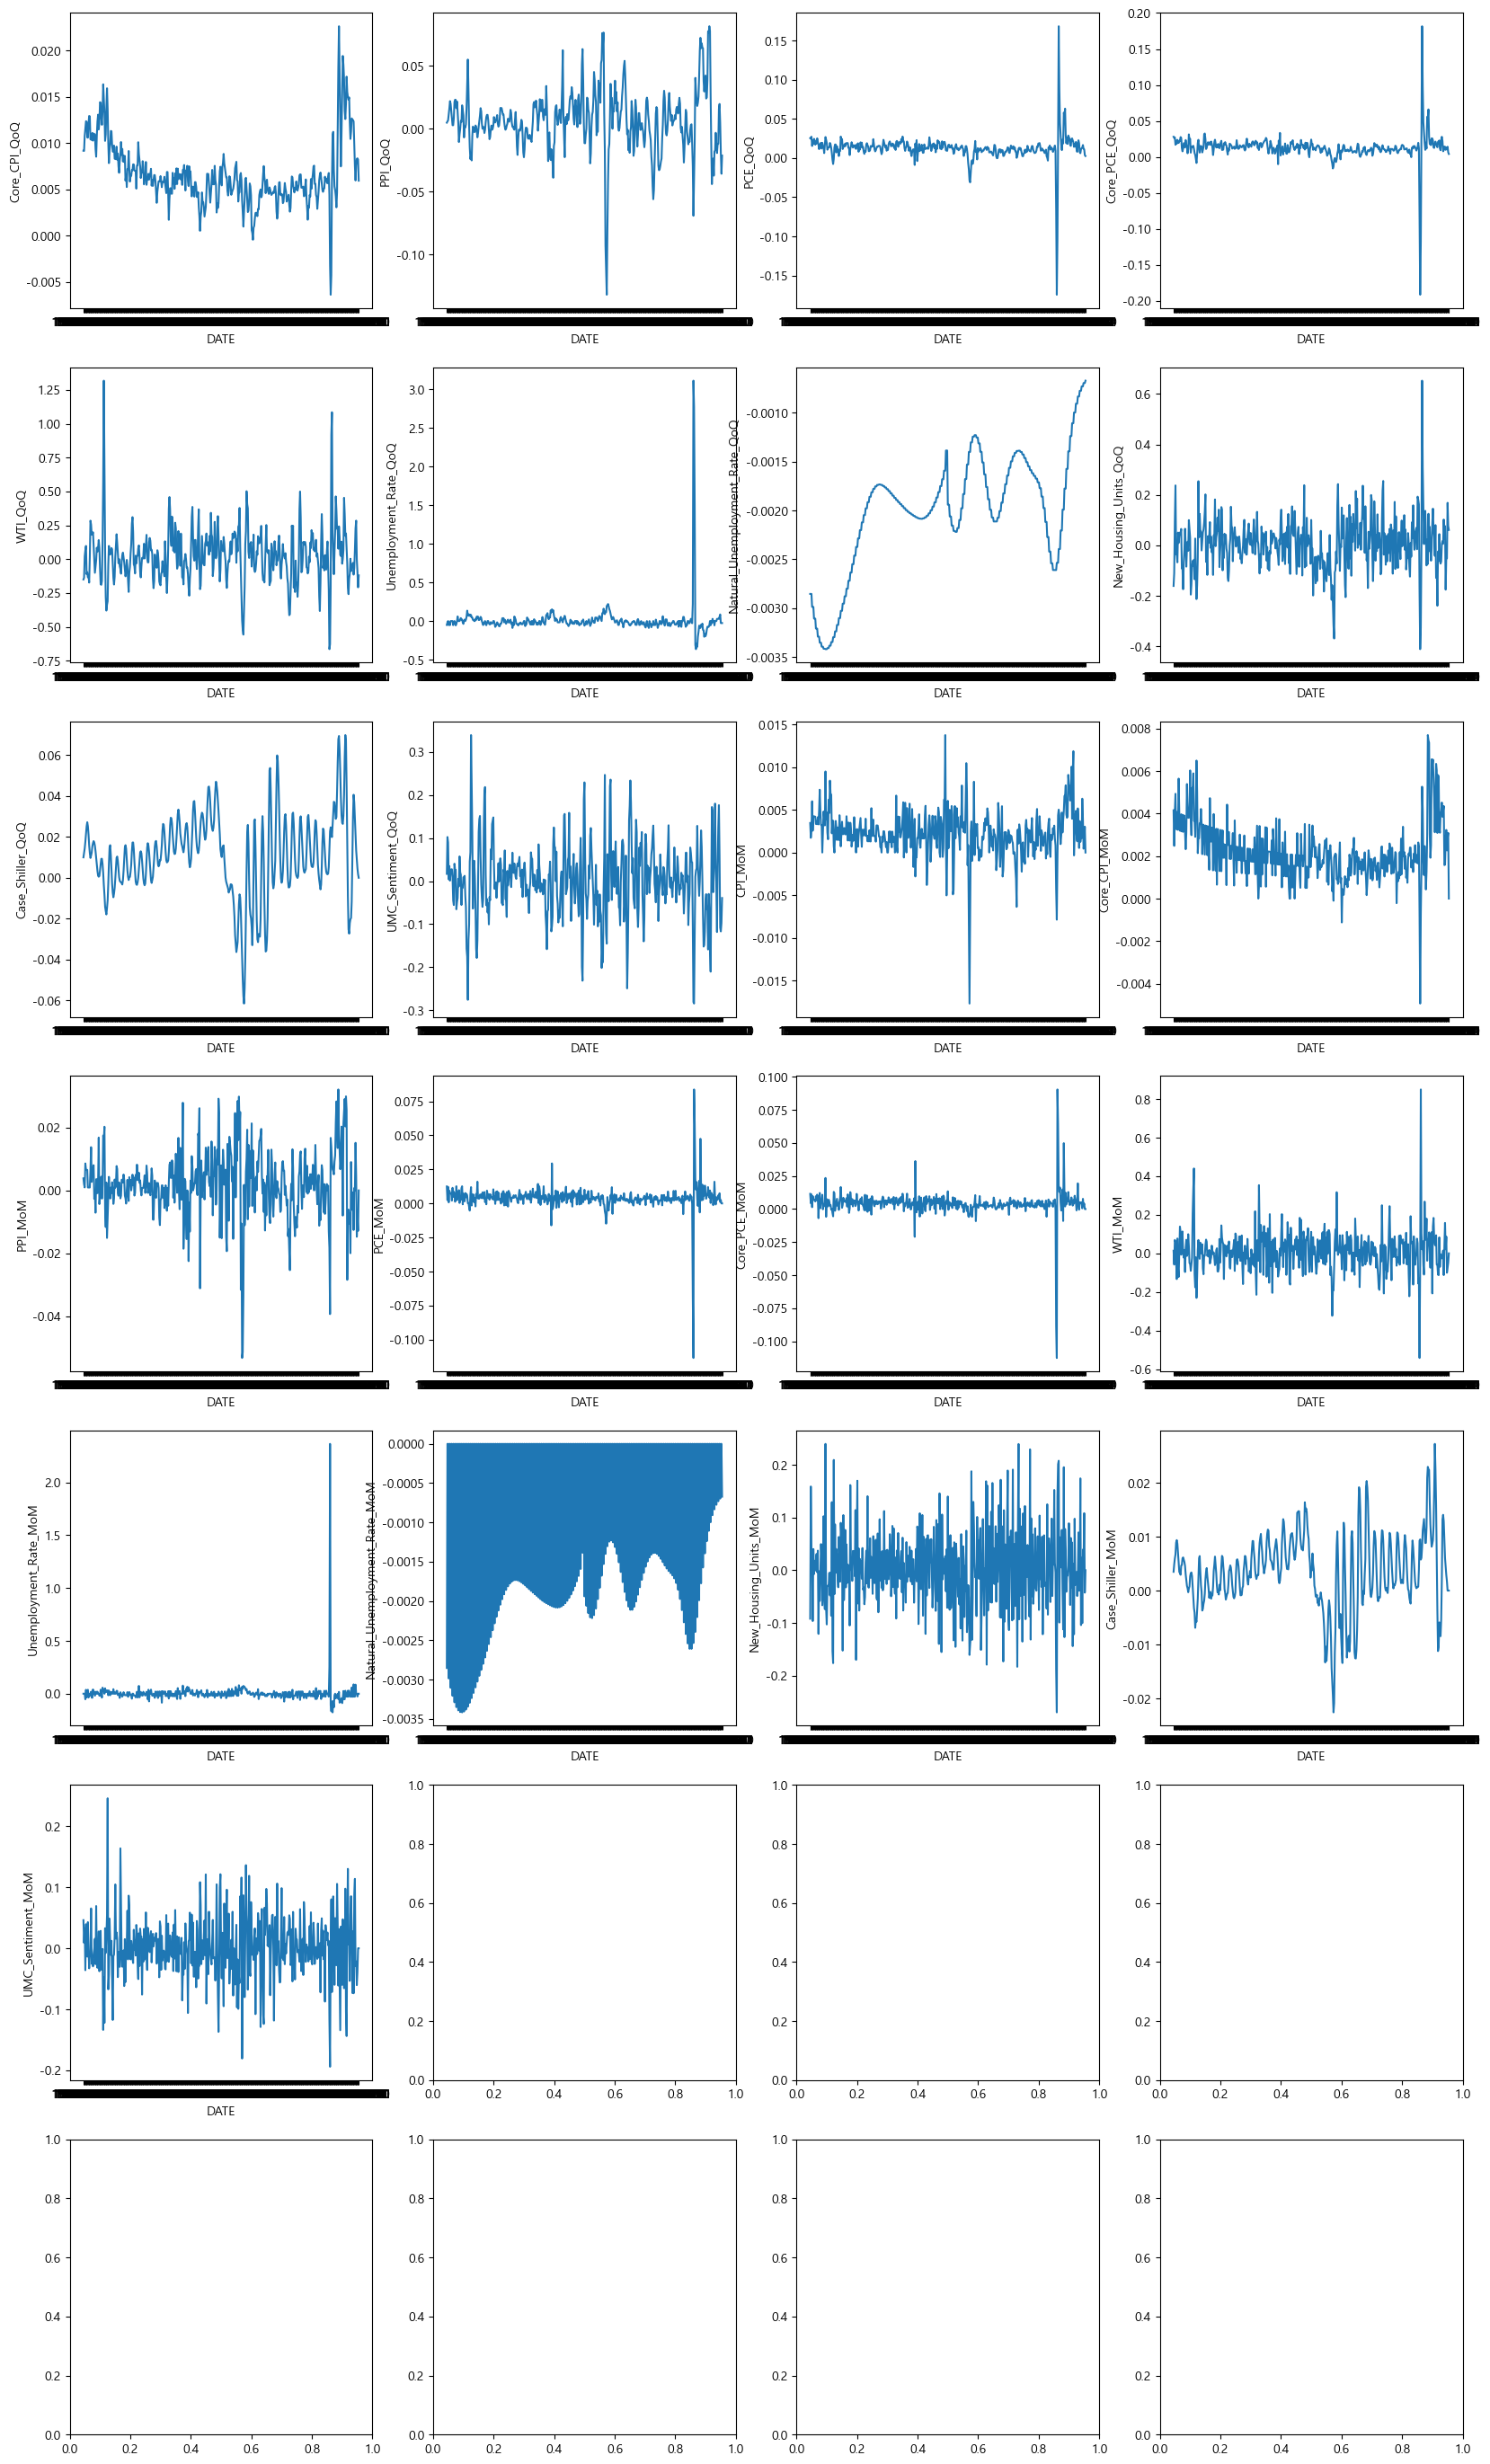

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 4
row_n = 7

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))



for i,col in enumerate(data_[data_.columns[40:]]):
    print(col)
    sns.lineplot(data_[col], ax=ax[int(i/col_n),int(i%col_n)])

In [19]:

scaler.fit(data_)

data_Std = scaler.transform(data_)


In [20]:

data_Std

array([[0.        , 0.        , 0.75789474, ..., 0.34877999, 0.52345638,
        0.5461365 ],
       [0.        , 0.        , 0.74385965, ..., 0.84133355, 0.5510157 ,
        0.46140778],
       [0.        , 0.        , 0.80350877, ..., 0.60812381, 0.57267882,
        0.51583011],
       ...,
       [0.        , 0.        , 0.14035088, ..., 0.74197824, 0.45356283,
        0.35230286],
       [0.        , 0.        , 0.06315789, ..., 0.44592792, 0.45356283,
        0.44137931],
       [0.        , 0.        , 0.06315789, ..., 0.52954544, 0.45356283,
        0.44137931]])

In [21]:
data_std = pd.DataFrame(data_Std,columns = data_.columns)
data_std 


,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,Core_CPI_MoM,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM
0,0.00,0.00,0.76,0.54,0.00,0.00,0.00,0.00,0.00,0.04,...,0.72,0.67,0.64,0.61,0.40,0.07,0.17,0.35,0.52,0.55
1,0.00,0.00,0.74,0.54,0.00,0.00,0.00,0.00,0.00,0.04,...,0.59,0.65,0.59,0.58,0.35,0.07,1.00,0.84,0.55,0.46
2,0.00,0.00,0.80,0.57,0.00,0.00,0.00,0.00,0.00,0.04,...,0.72,0.64,0.64,0.61,0.44,0.07,1.00,0.61,0.57,0.52
3,0.00,0.00,0.81,0.56,0.01,0.01,0.01,0.00,0.00,0.05,...,0.78,0.72,0.58,0.56,0.43,0.05,0.13,0.58,0.59,0.36
4,0.00,0.00,0.77,0.53,0.01,0.01,0.01,0.01,0.01,0.05,...,0.65,0.70,0.62,0.60,0.37,0.08,1.00,0.34,0.63,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.00,0.00,0.16,0.16,0.99,0.99,0.88,1.00,0.99,0.62,...,0.65,0.68,0.61,0.59,0.45,0.07,1.00,0.61,0.51,0.39
429,0.00,0.00,0.21,0.22,0.99,0.99,0.86,1.00,1.00,0.55,...,0.57,0.45,0.58,0.57,0.32,0.07,0.80,0.56,0.49,0.30
430,0.00,0.00,0.14,0.18,1.00,0.99,0.84,1.00,1.00,0.50,...,0.62,0.52,0.59,0.57,0.34,0.06,1.00,0.74,0.45,0.35
431,0.00,0.00,0.06,0.18,1.00,1.00,0.83,1.00,1.00,0.47,...,0.64,0.47,0.58,0.55,0.35,0.07,1.00,0.45,0.45,0.44


In [22]:
data_std.index = data_.index

In [23]:
data_std

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,Core_CPI_MoM,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM
DATE,,,,,,,,,,,,,,,,,,,,,
1988-01-31,0.00,0.00,0.76,0.54,0.00,0.00,0.00,0.00,0.00,0.04,...,0.72,0.67,0.64,0.61,0.40,0.07,0.17,0.35,0.52,0.55
1988-02-29,0.00,0.00,0.74,0.54,0.00,0.00,0.00,0.00,0.00,0.04,...,0.59,0.65,0.59,0.58,0.35,0.07,1.00,0.84,0.55,0.46
1988-03-31,0.00,0.00,0.80,0.57,0.00,0.00,0.00,0.00,0.00,0.04,...,0.72,0.64,0.64,0.61,0.44,0.07,1.00,0.61,0.57,0.52
1988-04-30,0.00,0.00,0.81,0.56,0.01,0.01,0.01,0.00,0.00,0.05,...,0.78,0.72,0.58,0.56,0.43,0.05,0.13,0.58,0.59,0.36
1988-05-31,0.00,0.00,0.77,0.53,0.01,0.01,0.01,0.01,0.01,0.05,...,0.65,0.70,0.62,0.60,0.37,0.08,1.00,0.34,0.63,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.00,0.00,0.16,0.16,0.99,0.99,0.88,1.00,0.99,0.62,...,0.65,0.68,0.61,0.59,0.45,0.07,1.00,0.61,0.51,0.39
2023-10-31,0.00,0.00,0.21,0.22,0.99,0.99,0.86,1.00,1.00,0.55,...,0.57,0.45,0.58,0.57,0.32,0.07,0.80,0.56,0.49,0.30
2023-11-30,0.00,0.00,0.14,0.18,1.00,0.99,0.84,1.00,1.00,0.50,...,0.62,0.52,0.59,0.57,0.34,0.06,1.00,0.74,0.45,0.35


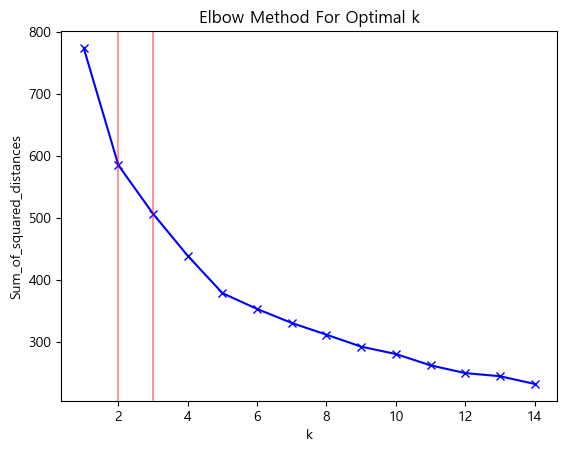

In [24]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_std)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(data_std)
  clusters = kmeans.predict(data_std)

  score = silhouette_score(data_std, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.24925587096915325
k : 3 score : 0.2665777543600273
k : 4 score : 0.2641451664440661
k : 5 score : 0.24781440917097083
k : 6 score : 0.22837790430185012
k : 7 score : 0.22736171657964327
k : 8 score : 0.2107658632910875
k : 9 score : 0.2280883146987158
k : 10 score : 0.23665050748356012
k : 11 score : 0.2210786652431957
k : 12 score : 0.24816544451966943
k : 13 score : 0.255721325268192
best n : 3 best score : 0.2665777543600273


In [26]:
kmeans = KMeans(n_clusters=2, init='k-means++',max_iter=300, random_state=42)
kmeans.fit(data_std)

data_std['cluster']= kmeans.labels_
data_std['cluster']

DATE
1988-01-31    0
1988-02-29    0
1988-03-31    0
1988-04-30    0
1988-05-31    0
             ..
2023-09-30    1
2023-10-31    1
2023-11-30    1
2023-12-31    1
2024-01-31    1
Name: cluster, Length: 433, dtype: int32

In [27]:
data_std['cluster'].to_csv("data.csv")

In [28]:
data_

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,Core_CPI_MoM,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM
DATE,,,,,,,,,,,,,,,,,,,,,
1988-01-31,0.00,0.00,2.44,1.04,116.00,120.90,104.60,3213.70,2689.80,16.97,...,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,-0.09,0.00,0.05
1988-02-29,0.00,0.00,2.36,1.03,116.20,121.20,104.80,3221.40,2701.50,15.98,...,0.00,0.00,0.00,0.00,-0.06,0.00,0.00,0.16,0.00,0.01
1988-03-31,0.00,0.00,2.70,1.16,116.50,121.70,104.90,3260.50,2731.50,17.09,...,0.00,0.00,0.01,0.01,0.07,0.00,0.00,0.04,0.01,0.03
1988-04-30,0.00,0.00,2.71,1.14,117.20,122.30,105.80,3263.00,2735.40,18.10,...,0.00,0.01,0.00,0.00,0.06,-0.05,-0.00,0.03,0.01,-0.04
1988-05-31,0.00,0.00,2.53,0.99,117.50,122.70,106.50,3293.60,2762.20,17.54,...,0.00,0.01,0.01,0.01,-0.03,0.04,0.00,-0.10,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.00,0.00,-0.96,-0.44,307.48,310.66,258.86,18791.50,16522.50,90.77,...,0.00,0.00,0.01,0.01,0.09,0.00,0.00,0.04,0.00,-0.02
2023-10-31,0.00,0.00,-0.71,-0.19,307.62,311.37,255.04,18812.20,16560.60,81.64,...,0.00,-0.01,0.00,0.00,-0.10,0.00,-0.00,0.01,0.00,-0.06
2023-11-30,0.00,0.00,-1.08,-0.36,307.92,312.25,252.84,18858.90,16629.20,75.66,...,0.00,-0.01,0.00,0.00,-0.07,-0.03,0.00,0.11,0.00,-0.04


In [29]:
data_std_cluster0 = data_std[data_std['cluster']==0]
data_std_cluster0

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM,cluster
DATE,,,,,,,,,,,,,,,,,,,,,
1988-01-31,0.00,0.00,0.76,0.54,0.00,0.00,0.00,0.00,0.00,0.04,...,0.67,0.64,0.61,0.40,0.07,0.17,0.35,0.52,0.55,0
1988-02-29,0.00,0.00,0.74,0.54,0.00,0.00,0.00,0.00,0.00,0.04,...,0.65,0.59,0.58,0.35,0.07,1.00,0.84,0.55,0.46,0
1988-03-31,0.00,0.00,0.80,0.57,0.00,0.00,0.00,0.00,0.00,0.04,...,0.64,0.64,0.61,0.44,0.07,1.00,0.61,0.57,0.52,0
1988-04-30,0.00,0.00,0.81,0.56,0.01,0.01,0.01,0.00,0.00,0.05,...,0.72,0.58,0.56,0.43,0.05,0.13,0.58,0.59,0.36,0
1988-05-31,0.00,0.00,0.77,0.53,0.01,0.01,0.01,0.01,0.01,0.05,...,0.70,0.62,0.60,0.37,0.08,1.00,0.34,0.63,0.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-03-31,0.00,0.00,0.26,0.29,0.46,0.46,0.37,0.41,0.41,0.42,...,0.80,0.60,0.58,0.44,0.06,1.00,0.55,0.42,0.37,0
2007-04-30,0.00,0.00,0.28,0.28,0.47,0.46,0.38,0.41,0.41,0.42,...,0.77,0.59,0.55,0.39,0.08,0.36,0.52,0.45,0.41,0
2007-05-31,0.00,0.00,0.36,0.27,0.47,0.46,0.39,0.41,0.41,0.41,...,0.75,0.60,0.59,0.37,0.06,1.00,0.43,0.43,0.47,0


In [30]:
# data_cluster0.to_csv('./240102/cluster0.csv')
# data_cluster0.head()

In [31]:
data_std_cluster1 = data_std[data_std['cluster']==1]
data_std_cluster1

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM,cluster
DATE,,,,,,,,,,,,,,,,,,,,,
2007-08-31,0.00,0.00,0.42,0.37,0.48,0.47,0.39,0.42,0.42,0.49,...,0.44,0.60,0.58,0.35,0.06,1.00,0.49,0.37,0.27,1
2007-09-30,0.00,0.00,0.46,0.43,0.48,0.47,0.39,0.42,0.42,0.55,...,0.70,0.60,0.57,0.46,0.08,1.00,0.31,0.33,0.44,1
2007-10-31,1.00,0.00,0.42,0.41,0.48,0.47,0.40,0.43,0.42,0.64,...,0.70,0.59,0.58,0.50,0.07,0.42,0.66,0.28,0.37,1
2007-11-30,1.00,0.00,0.47,0.51,0.49,0.48,0.42,0.43,0.42,0.60,...,0.91,0.61,0.57,0.35,0.07,1.00,0.43,0.19,0.31,1
2007-12-31,1.00,0.00,0.45,0.53,0.49,0.48,0.42,0.43,0.42,0.66,...,0.60,0.58,0.56,0.45,0.09,1.00,0.27,0.24,0.42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.00,0.00,0.16,0.16,0.99,0.99,0.88,1.00,0.99,0.62,...,0.68,0.61,0.59,0.45,0.07,1.00,0.61,0.51,0.39,1
2023-10-31,0.00,0.00,0.21,0.22,0.99,0.99,0.86,1.00,1.00,0.55,...,0.45,0.58,0.57,0.32,0.07,0.80,0.56,0.49,0.30,1
2023-11-30,0.00,0.00,0.14,0.18,1.00,0.99,0.84,1.00,1.00,0.50,...,0.52,0.59,0.57,0.34,0.06,1.00,0.74,0.45,0.35,1


In [32]:
# data_cluster1.to_csv('./240102/cluster1.csv')
# data_cluster1.head()

In [33]:
data_std_cluster0.describe()

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM,cluster
count,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,...,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00
mean,0.11,0.07,0.60,0.49,0.24,0.25,0.14,0.18,0.18,0.13,...,0.65,0.60,0.58,0.40,0.07,0.77,0.53,0.54,0.44,0.00
std,0.32,0.25,0.22,0.22,0.13,0.13,0.09,0.12,0.12,0.12,...,0.09,0.02,0.02,0.07,0.01,0.33,0.13,0.09,0.11,0.00
min,0.00,0.00,0.19,0.15,0.00,0.00,0.00,0.00,0.00,0.00,...,0.26,0.49,0.45,0.22,0.04,0.00,0.18,0.31,0.13,0.00
25%,0.00,0.00,0.41,0.31,0.14,0.15,0.08,0.07,0.07,0.06,...,0.61,0.59,0.57,0.35,0.06,0.45,0.46,0.47,0.38,0.00
50%,0.00,0.00,0.57,0.42,0.24,0.26,0.12,0.15,0.16,0.08,...,0.65,0.60,0.58,0.40,0.07,1.00,0.52,0.53,0.43,0.00
75%,0.00,0.00,0.79,0.68,0.34,0.37,0.18,0.27,0.27,0.15,...,0.70,0.61,0.59,0.44,0.08,1.00,0.61,0.59,0.50,0.00
max,1.00,1.00,1.00,0.96,0.47,0.47,0.40,0.42,0.41,0.52,...,0.97,0.72,0.73,0.71,0.10,1.00,1.00,0.78,1.00,0.00


In [34]:
data_std_cluster1.describe()

,Recession_GDP,Recession_NBER,Yield_Spread_10Y3M,Yield_Spread_10Y2Y,CPI,Core_CPI,PPI,PCE,Core_PCE,WTI,...,PPI_MoM,PCE_MoM,Core_PCE_MoM,WTI_MoM,Unemployment_Rate_MoM,Natural_Unemployment_Rate_MoM,New_Housing_Units_MoM,Case_Shiller_MoM,UMC_Sentiment_MoM,cluster
count,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,...,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00
mean,0.14,0.10,0.60,0.58,0.67,0.67,0.57,0.62,0.62,0.48,...,0.65,0.59,0.57,0.39,0.07,0.84,0.54,0.51,0.44,1.00
std,0.34,0.30,0.22,0.24,0.14,0.14,0.14,0.17,0.17,0.18,...,0.15,0.07,0.07,0.09,0.07,0.24,0.18,0.18,0.13,0.00
min,0.00,0.00,0.00,0.00,0.48,0.47,0.36,0.42,0.42,0.06,...,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.47,0.39,0.57,0.55,0.48,0.48,0.48,0.33,...,0.56,0.59,0.56,0.35,0.06,0.59,0.41,0.41,0.38,1.00
50%,0.00,0.00,0.61,0.59,0.63,0.64,0.54,0.59,0.59,0.48,...,0.65,0.59,0.57,0.40,0.07,1.00,0.54,0.50,0.45,1.00
75%,0.00,0.00,0.74,0.76,0.73,0.75,0.57,0.72,0.72,0.63,...,0.73,0.60,0.58,0.44,0.08,1.00,0.66,0.64,0.52,1.00
max,1.00,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.75,1.00


In [35]:
# pd.set_option('display.max_columns', None) ## 모든 열 출력
# pd.set_option('display.max_rows', None) ## 모든 행 출력

In [36]:
feature_list = data_std_cluster0.mean() - data_std_cluster1.mean()
feature_list

Recession_GDP                   -0.02
Recession_NBER                  -0.03
Yield_Spread_10Y3M               0.00
Yield_Spread_10Y2Y              -0.08
CPI                             -0.43
                                 ... 
Natural_Unemployment_Rate_MoM   -0.06
New_Housing_Units_MoM           -0.00
Case_Shiller_MoM                 0.03
UMC_Sentiment_MoM                0.00
cluster                         -1.00
Length: 62, dtype: float64

In [37]:
feature_list[:10]

Recession_GDP        -0.02
Recession_NBER       -0.03
Yield_Spread_10Y3M    0.00
Yield_Spread_10Y2Y   -0.08
CPI                  -0.43
Core_CPI             -0.42
PPI                  -0.42
PCE                  -0.45
Core_PCE             -0.44
WTI                  -0.35
dtype: float64

In [38]:
feature_list[10:20]

Unemployment_Rate           -0.06
Natural_Unemployment_Rate    0.46
New_Housing_Units            0.25
Case_Shiller                -0.36
NFCI                        -0.04
NFCI_Leverage                0.21
UMC_Sentiment                0.20
CPI_YoY                      0.05
Core_CPI_YoY                 0.09
PPI_YoY                     -0.01
dtype: float64

In [39]:
feature_list[20:30]

PCE_YoY                          0.04
Core_PCE_YoY                     0.04
WTI_YoY                          0.00
Unemployment_Rate_YoY           -0.02
Natural_Unemployment_Rate_YoY   -0.23
New_Housing_Units_YoY           -0.01
Case_Shiller_YoY                 0.06
UMC_Sentiment_YoY                0.02
CPI_HoH                          0.03
Core_CPI_HoH                     0.07
dtype: float64

In [40]:
feature_list = pd.DataFrame(feature_list)

In [41]:
feature_list.columns

RangeIndex(start=0, stop=1, step=1)

In [42]:
feature_list.sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [43]:
data_resampled = pd.read_csv('./resampled_data_.csv')

In [ ]:
data_resampled.set_index('DATE',inplace=True)
data_resampled

In [ ]:
label='Recession_NBER'
label_drop = 'Recession_GDP'
features = [col for col in data_resampled if col not in [label, label_drop]]
 
pct_cols = ['CPI', 'Core_CPI', 'PPI', 'PCE', 'Core_PCE', 'WTI', 'Unemployment_Rate', 'Natural_Unemployment_Rate', 'New_Housing_Units', 'Case_Shiller', 'UMC_Sentiment']
non_pct_cols = ['Yield_Spread_10Y3M', 'Yield_Spread_10Y2Y', 'NFCI', 'NFCI_Leverage']
 
features_org = pct_cols + non_pct_cols
features_YoY = [f'{col}_YoY' for col in pct_cols] + non_pct_cols
features_HoH = [f'{col}_HoH' for col in pct_cols] + non_pct_cols
features_QoQ = [f'{col}_QoQ' for col in pct_cols] + non_pct_cols
features_MoM = [f'{col}_MoM' for col in pct_cols] + non_pct_cols

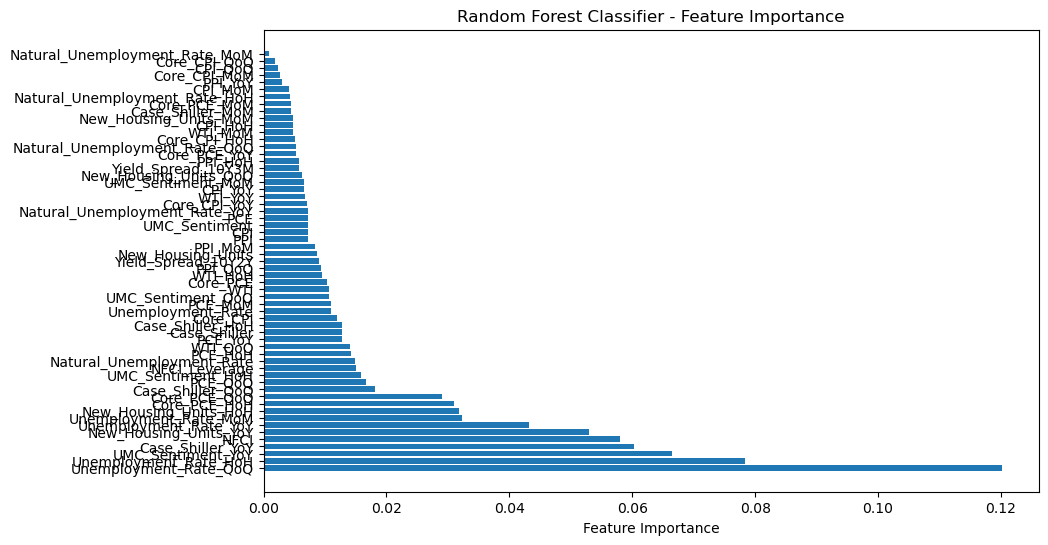

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 데이터 준비 (data_resampled은 이미 정의되어 있다고 가정)
X = data_resampled[features]
y = data_resampled[label]

# RandomForestClassifier 모델 생성 및 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature Importance 얻기
importances = model.feature_importances_

# 중요도와 피처 이름을 연결하여 정렬
feature_importance = list(zip(features, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), [imp[1] for imp in feature_importance], align='center')
plt.yticks(range(len(feature_importance)), [imp[0] for imp in feature_importance])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


In [ ]:
feature_importance

[('Unemployment_Rate_QoQ', 0.12011424048055519),
 ('Unemployment_Rate_HoH', 0.0784113858210069),
 ('UMC_Sentiment_YoY', 0.06653313185115521),
 ('Case_Shiller_YoY', 0.060241564740421756),
 ('NFCI', 0.05799942159953773),
 ('New_Housing_Units_YoY', 0.0529235716213228),
 ('Unemployment_Rate_YoY', 0.04324172790257407),
 ('Unemployment_Rate_MoM', 0.03230983423263309),
 ('New_Housing_Units_HoH', 0.031774532206667254),
 ('Core_PCE_HoH', 0.030965426298704624),
 ('Core_PCE_QoQ', 0.02896652311963875),
 ('Case_Shiller_QoQ', 0.018149025621693852),
 ('PCE_QoQ', 0.016701212392785783),
 ('UMC_Sentiment_HoH', 0.0158957379136047),
 ('NFCI_Leverage', 0.0150341689260204),
 ('Natural_Unemployment_Rate', 0.014888943975880743),
 ('PCE_HoH', 0.014208504000532774),
 ('WTI_QoQ', 0.014126786776180962),
 ('PCE_YoY', 0.012834797699568093),
 ('Case_Shiller', 0.012820554085392753),
 ('Case_Shiller_HoH', 0.012769355764437534),
 ('Core_CPI', 0.01188662611999563),
 ('Unemployment_Rate', 0.01100660284278163),
 ('PCE_MoM

In [ ]:
# Forward Selection

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward feature selection 수행
selected_features = []
best_score = 0

while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features


Selected feature: NFCI, Accuracy: 0.9655
Selected feature: Yield_Spread_10Y3M, Accuracy: 0.9885
Selected feature: UMC_Sentiment, Accuracy: 1.0000

Forward selected features:


In [ ]:
# Backward Elimination
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward feature selection 수행
selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features

Removed feature: Case_Shiller_QoQ, Accuracy: 1.0000

Final selected features:


In [ ]:
# Stepwise Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Stepwise feature selection 수행
selected_features = []
best_score = 0

# Forward step
while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

# Backward step
while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Stepwise = selected_features


Selected feature: NFCI, Accuracy: 0.9655
Selected feature: Yield_Spread_10Y3M, Accuracy: 0.9885
Selected feature: UMC_Sentiment, Accuracy: 1.0000

Final selected features:


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.9682


In [ ]:
lasso_best = LogisticRegression(C=2, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,Yield_Spread_10Y3M,1.15
1,Yield_Spread_10Y2Y,0.45
2,CPI,0.30
3,Core_CPI,0.15
4,PPI,0.06
5,PCE,-0.00
6,Core_PCE,-0.00
7,WTI,-0.14
8,Unemployment_Rate,-2.90
10,New_Housing_Units,-0.01


In [ ]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 16 개


['Yield_Spread_10Y3M',
 'Yield_Spread_10Y2Y',
 'CPI',
 'Core_CPI',
 'PPI',
 'PCE',
 'Core_PCE',
 'WTI',
 'Unemployment_Rate',
 'New_Housing_Units',
 'Case_Shiller',
 'NFCI',
 'NFCI_Leverage',
 'UMC_Sentiment',
 'Unemployment_Rate_YoY',
 'Unemployment_Rate_HoH']